# Le sur-apprentissage

Le surapprentissage, également appelé "overfitting" en anglais, est un concept clé en apprentissage automatique et en apprentissage supervisé. Il se produit lorsqu'un modèle d'apprentissage automatique s'ajuste trop étroitement aux données d'entraînement, au point de mémoriser le bruit ou les détails spécifiques des données, plutôt que d'apprendre les motifs généraux et abstraits qui sous-tendent les données. 

## Un exemple construit sur-apprentissage :

On construit 2 classes qui sont un tirages de gaussiennes centrées dans le plan sur le point (0,0) et (0.5,0).

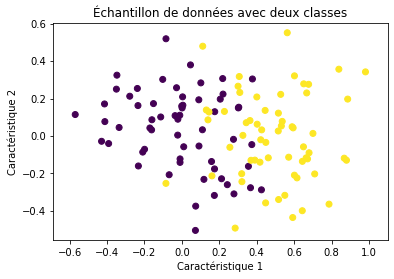

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres des gaussiennes
mean_class_0 = [0, 0]  # Centre de la classe 0
mean_class_1 = [0.5, 0]  # Centre de la classe 1
cov_matrix = [[0.05, 0], [0, 0.05]]  # Matrice de covariance identique pour les deux classes

# Générer des données pour chaque classe
num_samples_per_class = 60
class_0_data = np.random.multivariate_normal(mean_class_0, cov_matrix, num_samples_per_class)
class_1_data = np.random.multivariate_normal(mean_class_1, cov_matrix, num_samples_per_class)

# Créer des étiquettes pour chaque classe (0 pour la classe 0 et 1 pour la classe 1)
class_0_labels = np.zeros(num_samples_per_class, dtype=int)
class_1_labels = np.ones(num_samples_per_class, dtype=int)

# Fusionner les données et les étiquettes pour former l'ensemble de données complet
X = np.vstack((class_0_data, class_1_data))
y = np.hstack((class_0_labels, class_1_labels))

# Afficher les données
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Échantillon de données avec deux classes')
# Définir les axes de même taille
plt.axis('equal')

plt.show()


A partir de ce tirage on construit un réseau

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créez un modèle séquentiel
model = Sequential()

# Ajoutez une couche cachée avec 129 neurones, une fonction d'activation ReLU et une entrée de dimension 2
model.add(Dense(129, activation='relu', input_dim=2))

# Ajoutez une couche cachée avec 63 neurones, une fonction d'activation ReLU
model.add(Dense(63, activation='relu'))

# Ajoutez une couche de sortie avec une seule unité et une fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compilez le modèle en spécifiant la fonction de perte et l'optimiseur
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînez le modèle sur l'ensemble d'entraînement
model.fit(X, y, epochs=3000, batch_size=2*num_samples_per_class, verbose=0)

# Évaluez le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X, y, verbose=0)
print("Exactitude sur l'ensemble de test:", test_accuracy)

Et on trace la carte de prédiction ce ce model

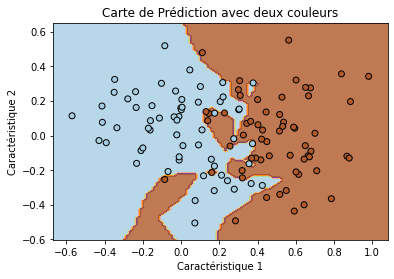

In [44]:
# Générer une grille de points dans le plan
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Utilisez le modèle pour prédire la classe de chaque point de la grille
predictions = model.predict(grid_points)
predictions = (predictions > 0.5).astype(int)  # Convertir les probabilités en classes (0 ou 1)

# Affichez la carte de prédiction avec deux couleurs
plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Carte de Prédiction avec deux couleurs')
plt.show()

On observe que le réseau s'adapte beaucoup trop aux données. En terme de probabilté la droite x=0.25 et la ligne de démarcation avec 50% de probailité pour chaque classe, on demande au réseau une réponse binaire celui-ci "colle" (trop) aux données.

En conclusion soit on a pas assez de données (dans la pratique ce peut être souvent le cas) soit il y a trop de neurones, ce qui est à peu près équivallent...

## Détection du sur-apprentissage

Le surapprentissage se produit lorsque le modèle a trop de paramètres par rapport à la quantité de données d'entraînement disponible. Le modèle apprend alors les données d'entraînement presque par cœur, ce qui peut entraîner une mauvaise généralisation sur de nouvelles données non vues.

Pour éviter le surapprentissage lors de l'apprentissage supervisé, vous pouvez mettre en œuvre plusieurs stratégies et bonnes pratiques. Voici quelques recommandations à suivre pour prévenir le surapprentissage :

* Collectez plus de données : L'une des méthodes les plus efficaces pour éviter le surapprentissage est de disposer d'un jeu de données plus important. Plus de données permettent au modèle de mieux généraliser ou "moyenniser".

* Utilisez des techniques d'augmentation des données : L'augmentation des données consiste à générer de nouvelles données d'entraînement en appliquant des transformations aléatoires aux données existantes. Cela peut aider à diversifier le jeu de données d'entraînement.

* Choisissez un modèle plus simple : Optez pour un modèle avec une complexité appropriée par rapport à la taille de votre jeu de données. Un modèle trop complexe a plus de chances de surapprendre.

* Divisez vos données : Divisez votre jeu de données en deux ensembles distincts : un ensemble d'entraînement et un ensemble de test. L'ensemble d'entraînement est utilisé pour entraîner le modèle et l'ensemble de test est utilisé pour évaluer la performance finale du modèle.

* Surveillez les courbes d'apprentissage : Tracez les courbes d'apprentissage pour surveiller les performances du modèle sur l'ensemble d'entraînement et l'ensemble de validation au fil du temps. Si les performances sur l'ensemble de validation commencent à se dégrader tandis que celles sur l'ensemble d'entraînement continuent d'augmenter, c'est un signe de surapprentissage.

Revenons sur ces 2 dernières techniques avec l'usage d'un ensemble d'apprentissage et de test et de visualiser le score sur les deux ensemble 


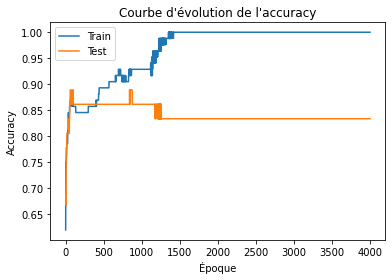

In [47]:
# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créez un modèle séquentiel (utilisez le même modèle que précédemment)
model = Sequential()
model.add(Dense(129, activation='relu', input_dim=2))
model.add(Dense(63, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînez le modèle et enregistrez l'historique
history = model.fit(X_train, y_train, epochs=4000, batch_size=2*num_samples_per_class, validation_data=(X_test, y_test), verbose=0)

# Tracez la courbe d'évolution de l'accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbe d\'évolution de l\'accuracy')
plt.show()

Si on prends un modèle plus simple

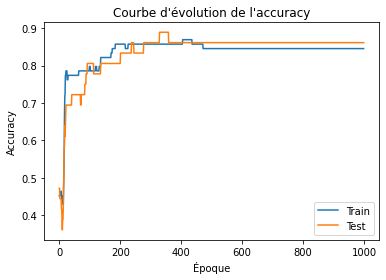

In [48]:
# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créez un modèle séquentiel (utilisez le même modèle que précédemment)
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Apprentissage sur l'ensemble d'apprentissage
# Entraînez le modèle et enregistrez l'historique
history = model.fit(X_train, y_train, epochs=1000, batch_size=2*num_samples_per_class, validation_data=(X_test, y_test), verbose=0)

# Tracez la courbe d'évolution de l'accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbe d\'évolution de l\'accuracy')
plt.show()


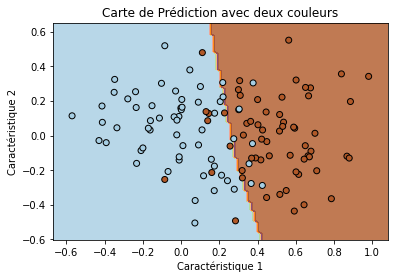

In [49]:
# Générer une grille de points dans le plan
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Utilisez le modèle pour prédire la classe de chaque point de la grille
predictions = model.predict(grid_points)
predictions = (predictions > 0.5).astype(int)  # Convertir les probabilités en classes (0 ou 1)

# Affichez la carte de prédiction avec deux couleurs
plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Carte de Prédiction avec deux couleurs')
plt.show()

## Retour sur les champignons :

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np 

df = pd.read_csv('mushrooms.csv');
df=df.assign(newodor=df['odor']);
df['newodor'].replace(['a','l','n'],'A',inplace=True)
df['newodor'].replace(['p','f','c','y','s','m'],'B',inplace=True)
from sklearn.preprocessing import LabelEncoder
# On encode la target par LabelEncoder, car l'on ne souhaite qu'un scalaire en sortie et non un vecteur, pour les besoins des graphes
la = LabelEncoder()
for i in df.columns:
    df[i] = la.fit_transform(df[i])
cor = df.corr()
rela = cor['class'].sort_values(ascending = False)
df.drop('veil-type', inplace = True, axis=1)
carac= []
for i in range(len(rela)):
    if rela[i]>0:
        carac.append(rela.index[i])
x = df.copy()[carac]
x.drop('class', inplace = True, axis = 1)

y= df['class']


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [15]:
# Créer un modèle séquentiel Keras
model = keras.Sequential()
model.add(layers.Input(shape=(9,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

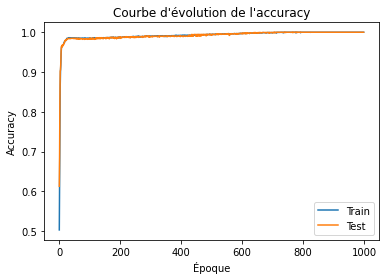

In [17]:
history = model.fit(x_train,y_train, epochs=1000, batch_size=151, validation_data=(x_test, y_test), verbose=0)

# Tracez la courbe d'évolution de l'accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbe d\'évolution de l\'accuracy')
plt.show()

## Pour aller plus loin 

### Cross-validation (K-Fold)

On vient de voir une technique ou simplement on sépare nos données d'apprentissage en 2 ensembles d'apprentissage et de test. Cela peux ne pas être satisfaisant ca on est tributaire de ce choix, on peut faire un mauvais tirage et on se prive de 10-20% des données d'apprentissage.

Une autre idée est de diviser l'ensemble d'apprentissage en $K$ échantillons. Tour à tour ces échantillons sont pris comme échantillon de test tandis que le reste de pris pour ensemble d'apprentissage


![Cross Validation](http://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png)

### Principe utile du Cross Validation

La difficultée et de trouver la bonne topologie du réseau - nombre de couche - nombre éléments par couche - fonctions de transfert - fonction de perte - tout en évitant un sur-apprentissage. La cross validation peut répondre en nous donnant une robustesse de notre modèle à l'echantillonage

![](http://ethen8181.github.io/machine-learning/model_selection/img/hyperparameter_search.png)

Bien sûr l'objectif est d'obtenir LE modèle

![](http://ethen8181.github.io/machine-learning/model_selection/img/refit.png)

### Exemple d'application

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Générer un jeu de données synthétiques (exemples avec 4 caractéristiques)
X = np.random.rand(100, 4)
y = np.random.choice(['A', 'B', 'C'], size=100)

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Transformer les étiquettes en encodage one-hot
y_onehot = to_categorical(y_encoded)

# Définir le modèle Keras (exemple simple avec une couche cachée)
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 classes de sortie
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialiser la validation croisée K-fold (ici, K=5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variables pour stocker les scores de chaque pli
cv_scores = []

# Boucle sur les plis de validation croisée
for train_index, test_index in kf.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_onehot[train_index], y_onehot[test_index]
    
    # Créer et entraîner le modèle pour ce pli
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Convertir les prédictions en étiquettes de classe prédites
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Convertir les étiquettes de test en classes
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculer l'accuracy pour ce pli
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    cv_scores.append(accuracy)

# Afficher les scores de chaque pli et la moyenne
for i, score in enumerate(cv_scores, 1):
    print(f"Plis {i}: Accuracy = {score:.2f}")
    
print(f"Accuracy moyenne sur tous les plis: {np.mean(cv_scores):.2f}")
